#### PREVISÃO DE DETECÇÃO DE FRAUDES EM TRANSAÇÕES FINANCEIRAS UTILIZANDO INTELIGÊNCIA ARTIFICIAL

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

sns.set_theme(style= 'darkgrid', palette='tab20c')

#### Processamento e Tratamento de Dados

In [4]:
# Lendo os dados e mostrando as 5 primeiras linhas
df = pd.read_csv(r'...\bs140513_032310.csv')
df.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [5]:
# Tamanho do dataset
df.shape

(594643, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [7]:
# Informações descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,594643.0,94.986827,51.053632,0.0,52.00,97.0,139.00,179.00
amount,594643.0,37.890135,111.402831,0.0,13.74,26.9,42.54,8329.96
fraud,594643.0,0.012108,0.109369,0.0,0.00,0.0,0.00,1.00


In [8]:
df.describe(include='object').T

,count,unique,top,freq
customer,594643,4112,'C1978250683',265
age,594643,8,'2',187310
gender,594643,4,'F',324565
zipcodeOri,594643,1,'28007',594643
merchant,594643,50,'M1823072687',299693
zipMerchant,594643,1,'28007',594643
category,594643,15,'es_transportation',505119


In [9]:
# Removendo colunas que possuem um unico valor
df= df.drop(columns= ['zipcodeOri', 'zipMerchant'])

# Removendo as aspas dos dados 
df['age'] = df['age'].str.replace("'", "").astype(str)
df['gender'] = df['gender'].str.replace("'", "").astype(str)
df['category'] = df['category'].str.replace("'", "").astype(str)
df['customer'] = df['customer'].str.replace("'", "").astype(str)
df['merchant'] = df['merchant'].str.replace("'", "").astype(str)

# Substituindo "U" da coluna Idade
df['age'] = df['age'].str.replace("U", "7").astype(int)

# Removendo o 'es' da coluna Categoria
df['category'] = df['category'].str.replace("es_", "").astype(str)

In [10]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,transportation,4.55,0
1,0,C352968107,2,M,M348934600,transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0
3,0,C1760612790,3,M,M348934600,transportation,17.25,0
4,0,C757503768,5,M,M348934600,transportation,35.72,0


In [11]:
df.age.value_counts()

2    187310
3    147131
4    109025
5     62642
1     58131
6     26774
0      2452
7      1178
Name: age, dtype: int64

In [12]:
df.category.value_counts()

transportation        505119
food                   26254
health                 16133
wellnessandbeauty      15086
fashion                 6454
barsandrestaurants      6373
hyper                   6098
sportsandtoys           4002
tech                    2370
home                    1986
hotelservices           1744
otherservices            912
contents                 885
travel                   728
leisure                  499
Name: category, dtype: int64

In [13]:
len(df.category.value_counts())

15

In [14]:
# Verificando a quantidade de dados de fraude 
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

#### Análise, Exploração e Vizualização dos Dados

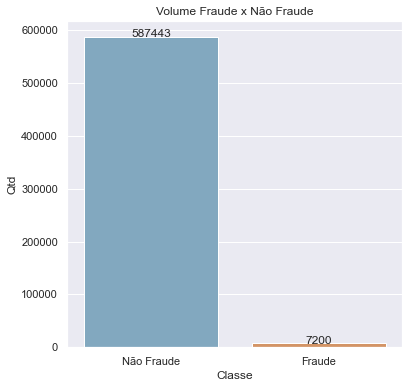

Quantidade de transações não fraudulentas: 587443
Quantidade de transações fraudulentas: 7200
Porcentagem de fraude em relação ao total de transações: 1.21%


In [15]:
# Volume por fraude e não fraude
plt.figure(figsize=(6, 6))
g= sns.countplot(x= 'fraud', data=df, palette= ['#78ABC9', '#E59154'])
plt.title("Volume Fraude x Não Fraude")
plt.xlabel('Classe')
g.set_xticklabels(['Não Fraude', 'Fraude'])
plt.ylabel('Qtd')
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='baseline')
plt.show()
print('Quantidade de transações não fraudulentas: {}'.format(df['fraud'].value_counts()[0]))
print('Quantidade de transações fraudulentas: {}'.format(df['fraud'].value_counts()[1]))
print('Porcentagem de fraude em relação ao total de transações: {}%'.format(round((df['fraud'].value_counts()[1]/df['fraud'].count())*100, 2)))

In [16]:
# Separando os dados em fraude e não fraude
df_fraud = df[df['fraud'] == 1]
df_notfraud = df[df['fraud'] == 0]

In [17]:
# Contagens de fraude e não fraude por categoria
fraud_counts = df_fraud['category'].value_counts().reset_index()
fraud_counts.columns = ['category', 'Fraude']
not_fraud_counts = df_notfraud['category'].value_counts().reset_index()
not_fraud_counts.columns = ['category', 'Não Fraude']

In [18]:
# Combinando os dataframes
group_df = pd.merge(fraud_counts, not_fraud_counts, on='category', how='outer')

# Renomeando coluna
group_df.rename(columns={'category': 'Categoria'}, inplace=True)

# Preenchendo valores ausentes com 0
group_df = group_df.fillna(0)

# Adicionando coluna Total por Categoria/ Percentual de fraudes em relação ao total por categoria
group_df['Total'] = group_df['Fraude'] + group_df['Não Fraude']
group_df['% Fraude'] = round((group_df['Fraude'] / group_df['Total']) * 100, 2)

# Ordenando o DataFrame pelo valor de Fraude em ordem decrescente
group_df = group_df.sort_values(by='Fraude', ascending=False)

In [19]:
group_df

,Categoria,Fraude,Não Fraude,Total,% Fraude
0,sportsandtoys,1982.0,2020,4002.0,49.53
1,health,1696.0,14437,16133.0,10.51
2,wellnessandbeauty,718.0,14368,15086.0,4.76
3,travel,578.0,150,728.0,79.40
4,hotelservices,548.0,1196,1744.0,31.42
5,leisure,474.0,25,499.0,94.99
6,home,302.0,1684,1986.0,15.21
7,hyper,280.0,5818,6098.0,4.59
8,otherservices,228.0,684,912.0,25.00
9,tech,158.0,2212,2370.0,6.67


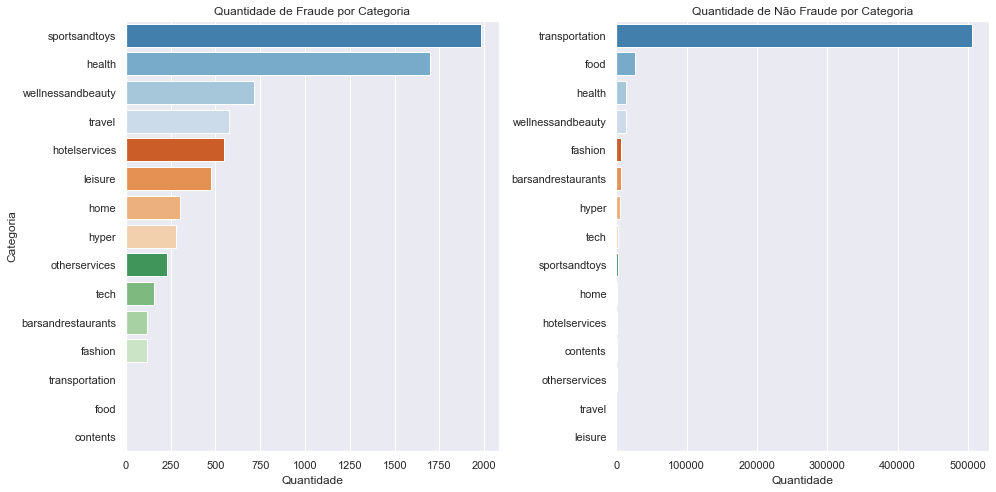

In [20]:
#Distribuição por Categoria
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Primeiro subplot
sns.barplot(data=group_df, x='Fraude', y='Categoria', ax=axes[0])
axes[0].set_xlabel('Quantidade')
axes[0].set_ylabel('Categoria')
axes[0].set_title('Quantidade de Fraude por Categoria')

# Segundo subplot 
sns.barplot(data=group_df.sort_values(by='Não Fraude', ascending=False), x='Não Fraude', y='Categoria', ax=axes[1])
axes[1].set_xlabel('Quantidade')
axes[1].set_ylabel('')
axes[1].set_title('Quantidade de Não Fraude por Categoria')

plt.tight_layout()

plt.show()


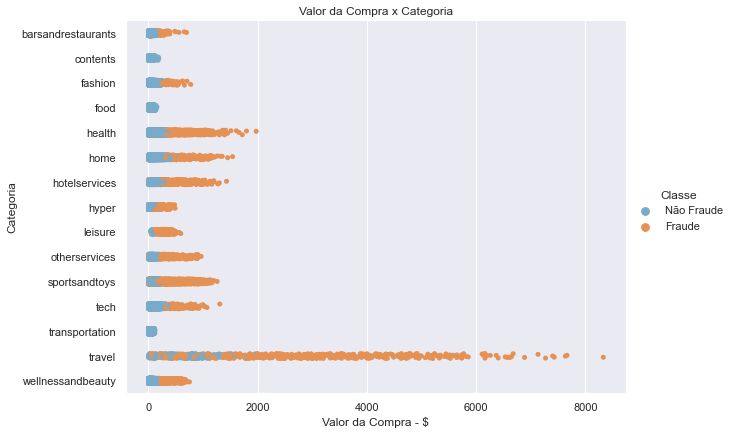

In [21]:
#Compras por categoria
class_labels = {'0': 'Não Fraude', '1': 'Fraude'}

g= sns.catplot(data=df.sort_values(by='category'), y='category', x='amount', hue='fraud', height=6, aspect=1.5, palette= ['#78ABC9', '#E59154'])
g._legend.set_title('Classe') 
sns.move_legend(g, "upper center", bbox_to_anchor=(1, .6))
plt.title("Valor da Compra x Categoria")
plt.ylabel('Categoria')
plt.xlabel('Valor da Compra - $')
# Renomeando os rótulos da legenda
for t, l in zip(g._legend.texts, class_labels.values()):
    t.set_text(l)
plt.show()

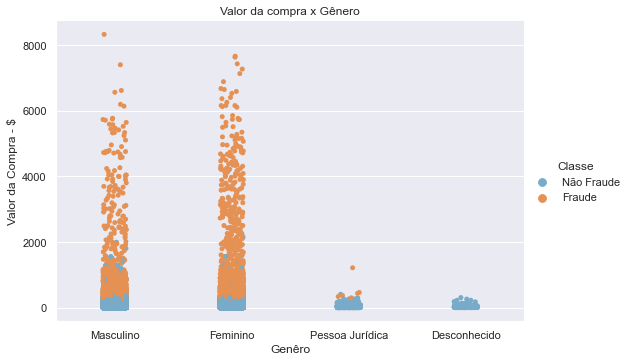

In [22]:
#Compras por Genero 
class_labels = {'0': 'Não Fraude', '1': 'Fraude'}
g= sns.catplot(data=df, x='gender', y='amount', hue='fraud', height=5, aspect=1.5, palette= ['#78ABC9', '#E59154'])
g._legend.set_title('Classe') 
sns.move_legend(g, "upper center", bbox_to_anchor=(1, .6))
plt.title("Valor da compra x Gênero")
plt.ylabel('Valor da Compra - $')
plt.xlabel('Genêro')
g.set_xticklabels(['Masculino', 'Feminino', 'Pessoa Jurídica', 'Desconhecido'])
# Renomeando os rótulos da legenda
for t, l in zip(g._legend.texts, class_labels.values()):
    t.set_text(l)
plt.show()

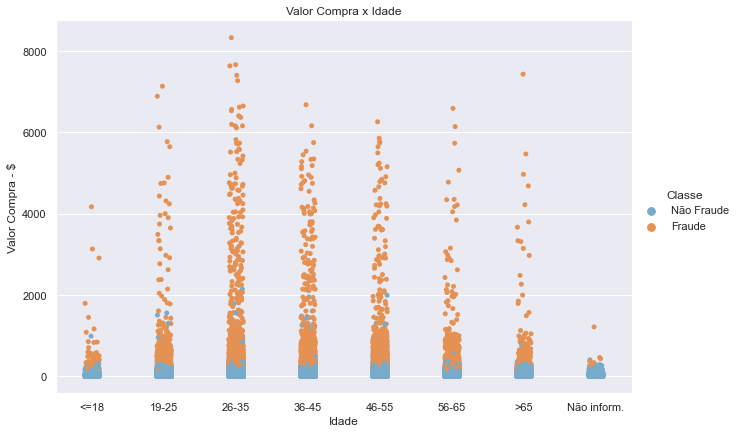

In [23]:
#Compras por Idade 
class_labels = {'0': 'Não Fraude', '1': 'Fraude'}
g= sns.catplot(data=df, x='age', y='amount', hue='fraud', height=6, aspect=1.5, palette= ['#78ABC9', '#E59154'])
g._legend.set_title('Classe') 
sns.move_legend(g, "upper center", bbox_to_anchor=(1, .6))
plt.title("Valor Compra x Idade")
plt.ylabel('Valor Compra - $')
plt.xlabel('Idade')
g.set_xticklabels(['<=18', '19-25', '26-35', '36-45', '46-55', '56-65', '>65', 'Não inform.'])
# Renomeando os rótulos da legenda
for t, l in zip(g._legend.texts, class_labels.values()):
    t.set_text(l)
plt.show()

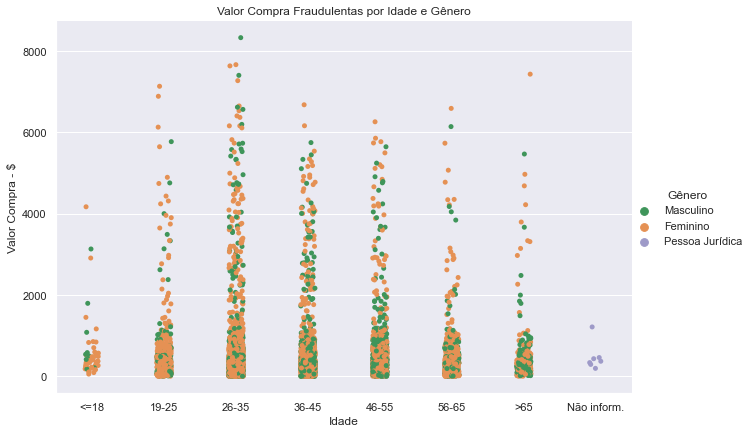

In [24]:
#Valor Compra Fraudulenta por Idade e Genero
gender_labels = {'M': 'Masculino', 'F': 'Feminino', 'E': 'Pessoa Jurídica'}
g= sns.catplot(data=df_fraud, x='age', y='amount', hue='gender', height= 6, aspect=1.5, palette= ['#3f955a','#E59154', '#9e9ac8'])
g.set_xticklabels(['<=18', '19-25', '26-35', '36-45', '46-55', '56-65', '>65', 'Não inform.'])
g._legend.set_title('Gênero') 
sns.move_legend(g, "upper center", bbox_to_anchor=(1, .6))

plt.title("Valor Compra Fraudulentas por Idade e Gênero")
plt.ylabel('Valor Compra - $')
plt.xlabel('Idade')
# Renomeando os rótulos da legenda
for t, l in zip(g._legend.texts, gender_labels.values()):
    t.set_text(l)
plt.show()

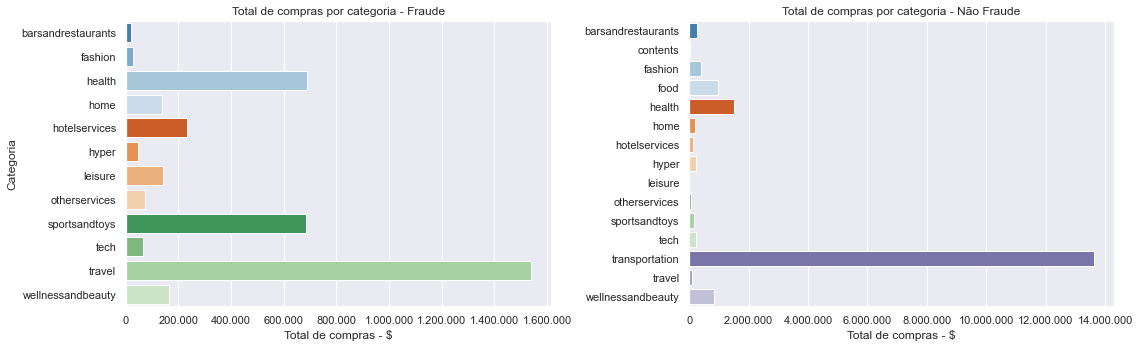

In [25]:
#Distribuição da Soma total de compras por Categoria

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Primeiro subplot
sns.barplot(data=df_fraud.sort_values(by='category'), x='amount', y='category', estimator=sum, ci= None, ax=axes[0])
axes[0].set_ylabel('Categoria')
axes[0].set_xlabel('Total de compras - $')
axes[0].set_title('Total de compras por categoria - Fraude')
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string('%.0f', x, grouping=True)))

# Segundo subplot 
sns.barplot(data=df_notfraud.sort_values(by='category'), x='amount', y='category', estimator=sum, ci= None, ax=axes[1])
axes[1].set_xlabel('Total de compras - $')
axes[1].set_ylabel('')
axes[1].set_title('Total de compras por categoria - Não Fraude')
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string('%.0f', x, grouping=True)))

plt.tight_layout()

plt.show()

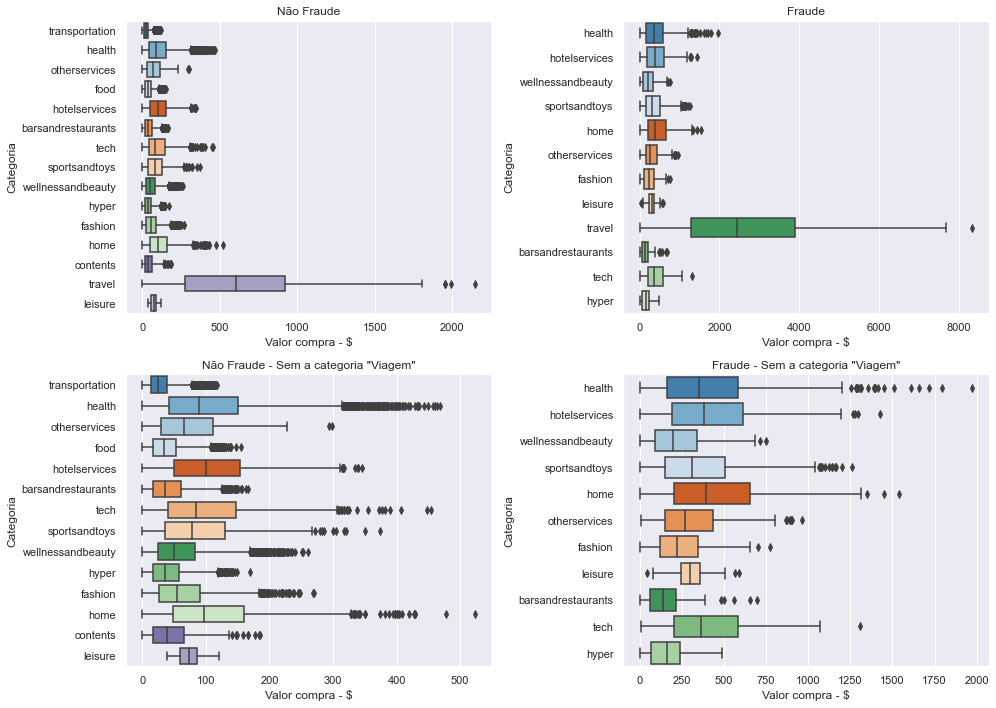

In [26]:
#Boxplot categoria
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Primeiro subplot
sns.boxplot(y=df_notfraud['category'] ,x=df_notfraud['amount'],  ax=axes[0, 0])
axes[0, 0].set_ylabel('Categoria')
axes[0, 0].set_xlabel('Valor compra - $')
axes[0, 0].set_title('Não Fraude')

# Segundo subplot 
sns.boxplot(y=df_fraud['category'] ,x=df_fraud['amount'],   ax=axes[0, 1])
axes[0, 1].set_ylabel('Categoria')
axes[0, 1].set_xlabel('Valor compra - $')
axes[0, 1].set_title('Fraude')

# Terceiro subplot
sns.boxplot(y=df_notfraud[df_notfraud['category'] != 'travel']['category'] ,x=df_notfraud[df_notfraud['category'] != 'travel']['amount'],  ax=axes[1, 0])
axes[1, 0].set_ylabel('Categoria')
axes[1, 0].set_xlabel('Valor compra - $')
axes[1, 0].set_title('Não Fraude - Sem a categoria "Viagem"')

# Quarto subplot 
sns.boxplot(y=df_fraud[df_fraud['category'] != 'travel']['category'] ,x=df_fraud[df_fraud['category'] != 'travel']['amount'],   ax=axes[1, 1])
axes[1, 1].set_ylabel('Categoria')
axes[1, 1].set_xlabel('Valor compra - $')
axes[1, 1].set_title('Fraude - Sem a categoria "Viagem"')

plt.tight_layout()
plt.show()


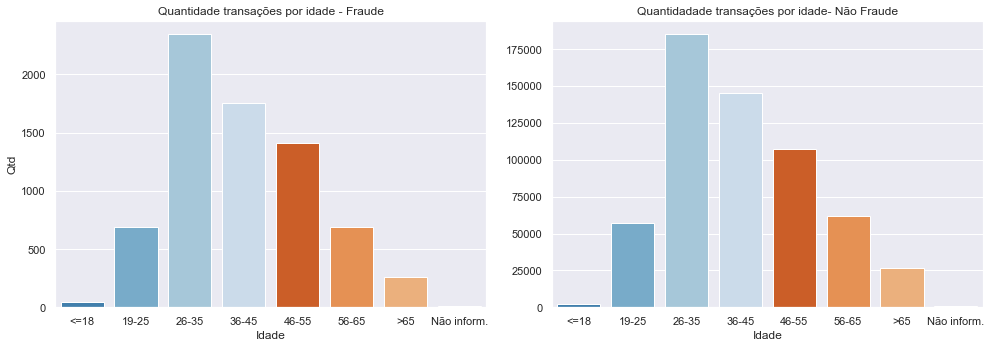

In [27]:
#Distribuição da quantidade de transações por Idade

new_labels = ['<=18', '19-25', '26-35', '36-45', '46-55', '56-65', '>65', 'Não inform.']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Primeiro subplot
sns.countplot(data=df_fraud, x='age', order= sorted(df_fraud['age'].unique()), ax=axes[0])
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Qtd')
axes[0].set_title('Quantidade transações por idade - Fraude')
axes[0].set_xticklabels(new_labels)

# Segundo subplot 
sns.countplot(data=df_notfraud, x='age',  order= sorted(df_fraud['age'].unique()), ax=axes[1])
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('')
axes[1].set_title('Quantidadade transações por idade- Não Fraude')
axes[1].set_xticklabels(new_labels)


plt.tight_layout()
plt.show()

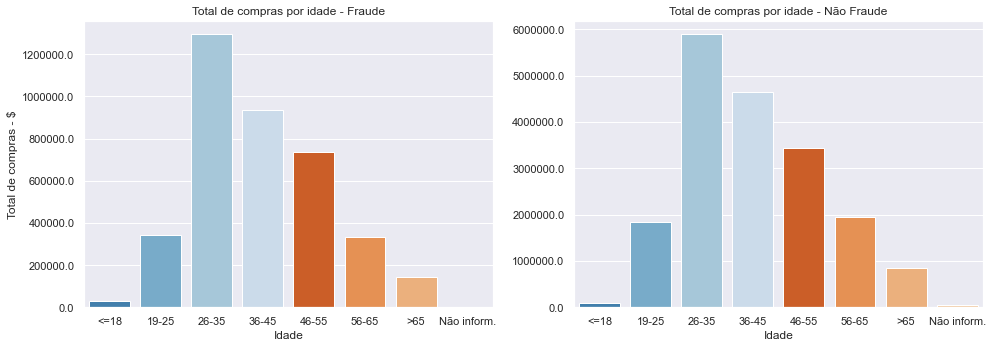

In [28]:
#Distribuição da Soma  total de compras por Idade

new_labels = ['<=18', '19-25', '26-35', '36-45', '46-55', '56-65', '>65', 'Não inform.']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Primeiro subplot
sns.barplot(data=df_fraud, x='age', y='amount', estimator=sum, ci= None, ax=axes[0])
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Total de compras - $')
axes[0].set_title('Total de compras por idade - Fraude')
axes[0].set_xticklabels(new_labels)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: round(x, 2))) 

# Segundo subplot 
sns.barplot(data=df_notfraud, x='age', y='amount', estimator=sum, ci= None, ax=axes[1])
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('')
axes[1].set_title('Total de compras por idade - Não Fraude')
axes[1].set_xticklabels(new_labels)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: round(x, 2)))

plt.tight_layout()

plt.show()

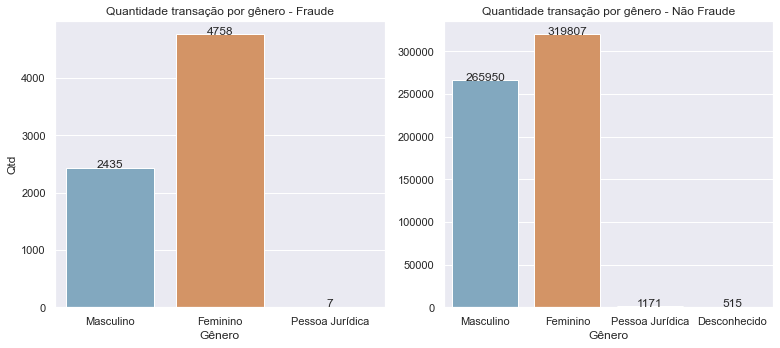

In [29]:
#Distribuição de Frequencia de Transações por Gênero

fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# Primeiro subplot
sns.countplot(data=df_fraud, x='gender', ax=axes[0], palette= ['#78ABC9', '#E59154','#3F955A'])
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Qtd')
axes[0].set_title('Quantidade transação por gênero - Fraude')
axes[0].set_xticklabels(['Masculino', 'Feminino', 'Pessoa Jurídica'])

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Segundo subplot 
sns.countplot(data=df_notfraud, x='gender', ax=axes[1], palette= ['#78ABC9', '#E59154','#3F955A', '#9e9ac8'])
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('')
axes[1].set_title('Quantidade transação por gênero - Não Fraude')
axes[1].set_xticklabels(['Masculino', 'Feminino', 'Pessoa Jurídica', 'Desconhecido'])

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()

plt.show()

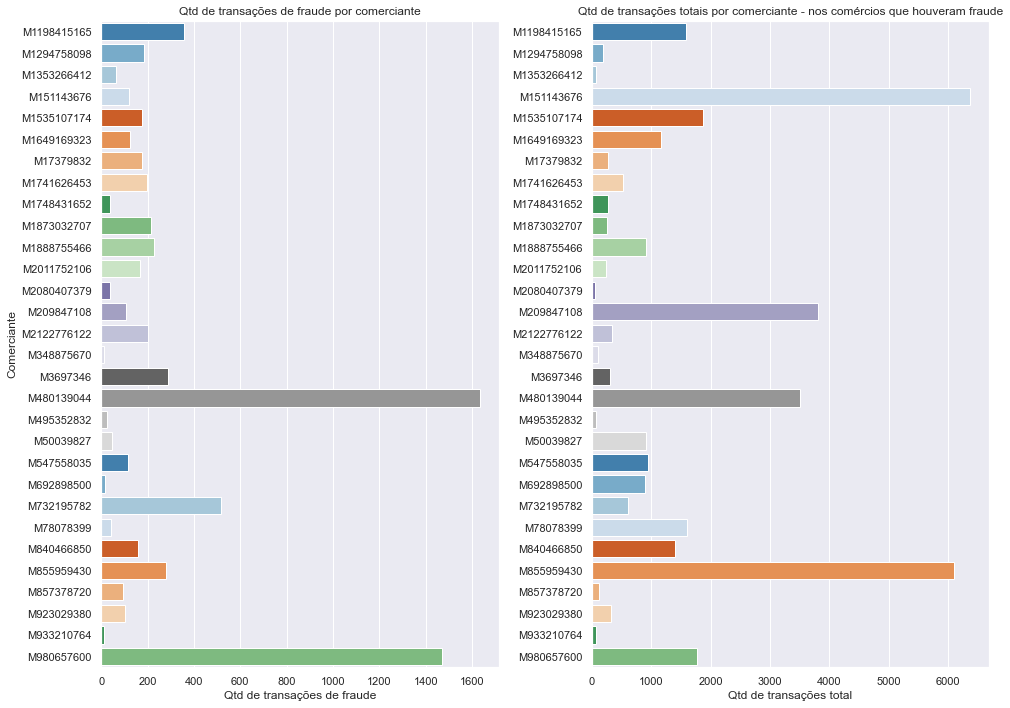

In [30]:
#Frequencia de transação por Comerciante
filtered_df = df[df['merchant'].isin(df_fraud['merchant'])]

fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Primeiro subplot
sns.countplot(data=df_fraud.sort_values(by='merchant'), y='merchant', palette= 'tab20c', ax=axes[0])
axes[0].set_xlabel('Qtd de transações de fraude')
axes[0].set_ylabel('Comerciante')
axes[0].set_title('Qtd de transações de fraude por comerciante')


# Segundo subplot 
sns.countplot(data=filtered_df.sort_values(by='merchant'), y='merchant', ax=axes[1], palette= 'tab20c')
axes[1].set_xlabel('Qtd de transações total')
axes[1].set_ylabel('')
axes[1].set_title('Qtd de transações totais por comerciante - nos comércios que houveram fraude')


plt.tight_layout()

plt.show()

In [31]:
df_fraud.merchant.value_counts()

M480139044     1634
M980657600     1472
M732195782      518
M1198415165     358
M3697346        290
M855959430      280
M1888755466     228
M1873032707     216
M2122776122     200
M1741626453     196
M1294758098     184
M17379832       178
M1535107174     174
M2011752106     166
M840466850      158
M1649169323     124
M151143676      120
M547558035      116
M209847108      106
M923029380      102
M857378720       92
M1353266412      64
M50039827        46
M78078399        44
M1748431652      36
M2080407379      36
M495352832       24
M692898500       16
M933210764       12
M348875670       10
Name: merchant, dtype: int64

In [32]:
round(df_fraud.merchant[df_fraud.merchant == 'M480139044'].count()/ df_fraud.merchant.count()*100, 2)

22.69

In [33]:
round(df_fraud.merchant[df_fraud.merchant == 'M480139044'].count()/filtered_df.merchant[filtered_df.merchant == 'M480139044'].count()*100, 2)

46.58

#### Preparação dos Dados para os Modelos de Aprendizado de Máquina - Em construção

In [34]:
df_encoded = pd.get_dummies(df, columns=['category', 'gender'])

In [35]:
df_encoded

,step,customer,age,merchant,amount,fraud,category_barsandrestaurants,category_contents,category_fashion,category_food,...,category_otherservices,category_sportsandtoys,category_tech,category_transportation,category_travel,category_wellnessandbeauty,gender_E,gender_F,gender_M,gender_U
0,0,C1093826151,4,M348934600,4.55,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,C352968107,2,M348934600,39.68,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,C2054744914,4,M1823072687,26.89,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,C1760612790,3,M348934600,17.25,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,C757503768,5,M348934600,35.72,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,M1823072687,20.53,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
594639,179,C650108285,4,M1823072687,50.73,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
594640,179,C123623130,2,M349281107,22.44,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
594641,179,C1499363341,5,M1823072687,14.46,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


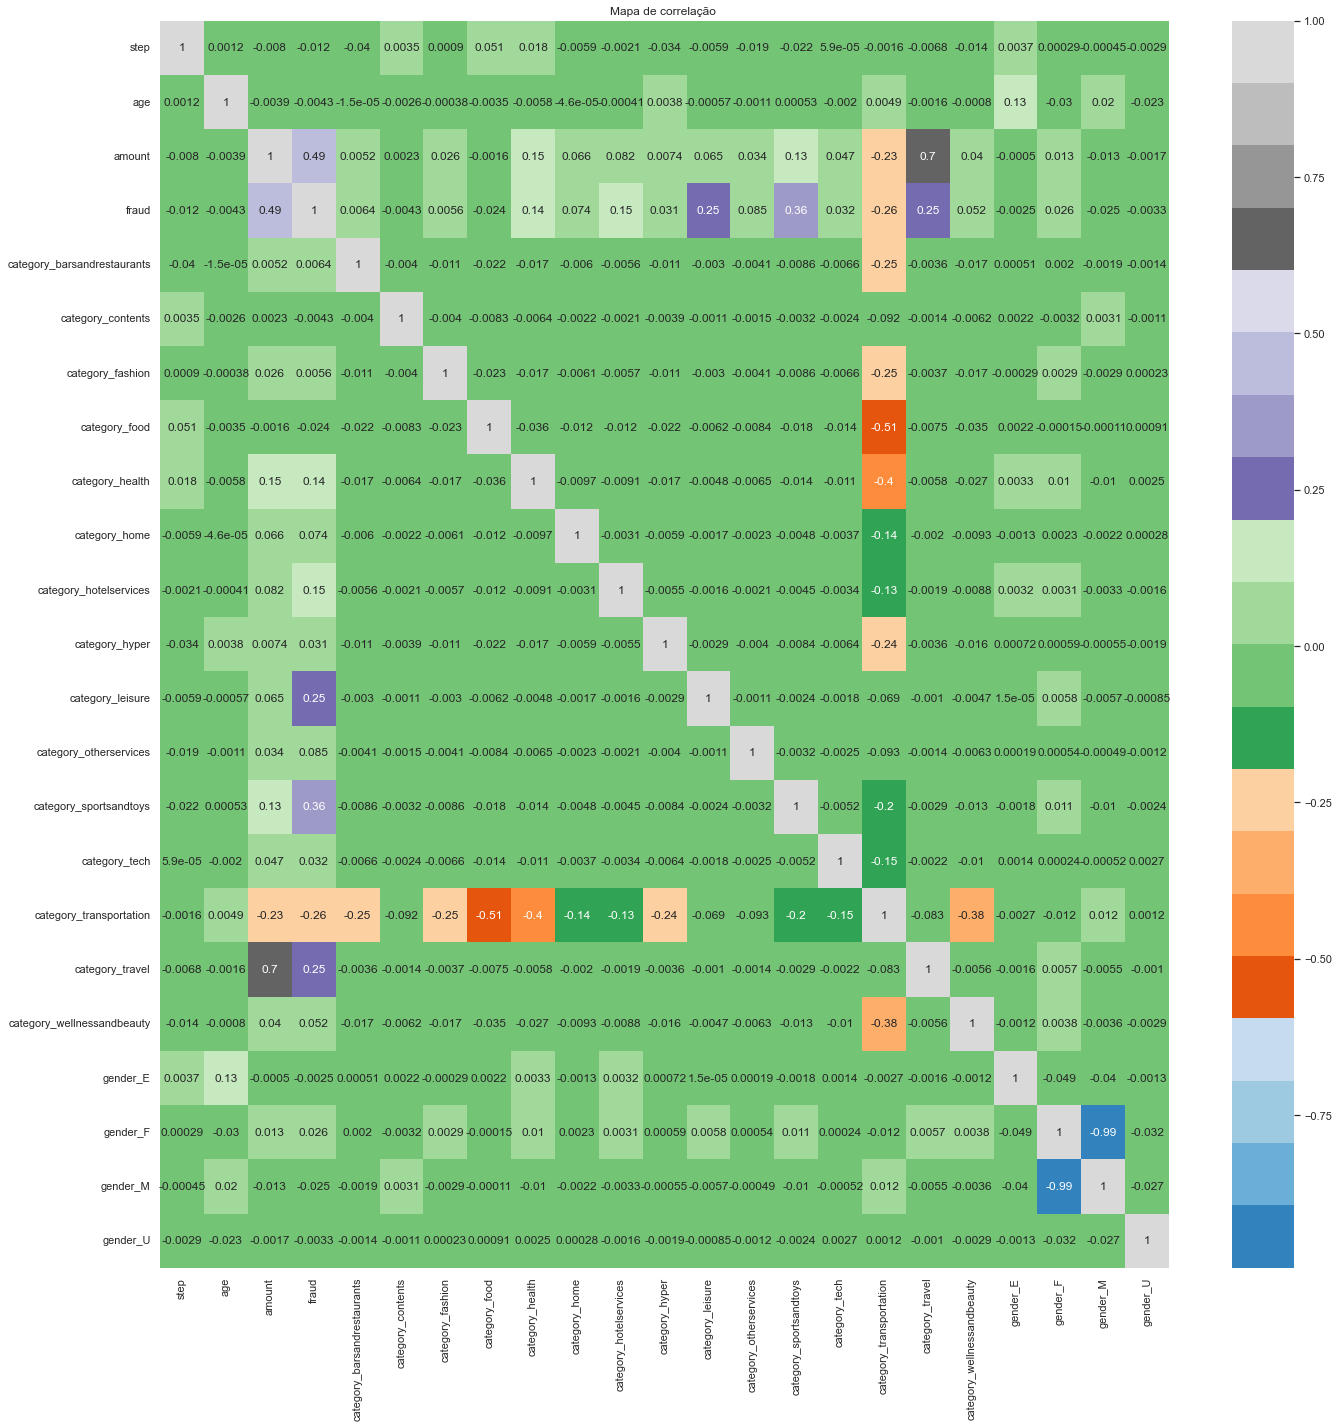

In [36]:
#Correlação entre variáveis
fig, ax=plt.subplots(figsize=(20, 20))
ax=sns.heatmap(df_encoded.corr(), annot= True, cmap= 'tab20c')
ax.set_title('Mapa de correlação ')
fig.tight_layout()

In [37]:
df_lab_encoded= df_fraud.copy()

In [38]:
df_lab_encoded.dtypes

step          int64
customer     object
age           int32
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object

In [39]:
# 20Rótulos para 'category', 'gender' e 'merchant'
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df_lab_encoded['category_encoded'] = label_encoder.fit_transform(df_lab_encoded['category'])
df_lab_encoded['gender_encoded'] = label_encoder.fit_transform(df_lab_encoded['gender'])
df_lab_encoded['merchant_encoded'] = label_encoder.fit_transform(df_lab_encoded['merchant'])
df_lab_encoded['customer_encoded'] = label_encoder.fit_transform(df_lab_encoded['customer'])

In [40]:
df_lab_encoded.drop(columns= ['category', 'merchant', 'gender', 'customer'], inplace=True)

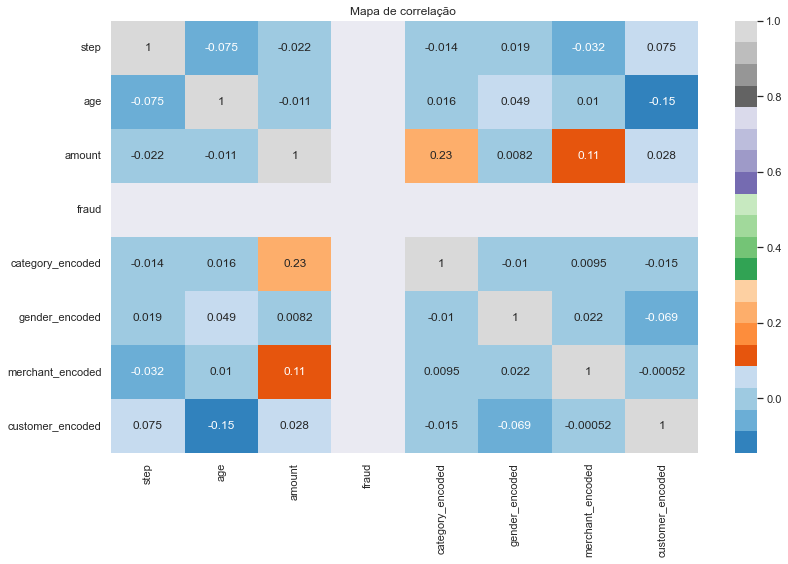

In [41]:
#Correlação entre variáveis
fig, ax=plt.subplots(figsize=(12, 8))
ax=sns.heatmap(df_lab_encoded.corr(), annot= True, cmap= 'tab20c')
ax.set_title('Mapa de correlação ')
fig.tight_layout()